Note: you may need to restart the kernel to use updated packages.
Dataset shape: (7803, 128, 128, 3)


c:\Users\ADITYA\anaconda3\envs\brainml\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.6737 - loss: 0.7865 - val_accuracy: 0.8279 - val_loss: 0.4598
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.8386 - loss: 0.4181 - val_accuracy: 0.8575 - val_loss: 0.3843
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - accuracy: 0.8892 - loss: 0.2948 - val_accuracy: 0.8895 - val_loss: 0.3053
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9297 - loss: 0.1942 - val_accuracy: 0.8823 - val_loss: 0.3520
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9573 - loss: 0.1162 - val_accuracy: 0.8463 - val_loss: 0.5252
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.9345 - loss: 0.1885 - val_accuracy: 0.8983 - val_loss: 0.3284
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - accuracy: 0.9589 - loss: 0.1171 - val_accuracy: 0.9231 - val_loss: 0.2574
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - accuracy: 0.9902 - loss: 0

Model saved as model.h5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9276 - loss: 0.3273
Test accuracy: 0.9276105165481567
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step

Classification Report:
              precision    recall  f1-score   support

      glioma       0.90      0.91      0.91       376
  meningioma       0.89      0.85      0.87       393
     notumor       0.98      0.98      0.98       399
   pituitary       0.94      0.96      0.95       393

    accuracy                           0.93      1561
   macro avg       0.93      0.93      0.93      1561
weighted avg       0.93      0.93      0.93      1561



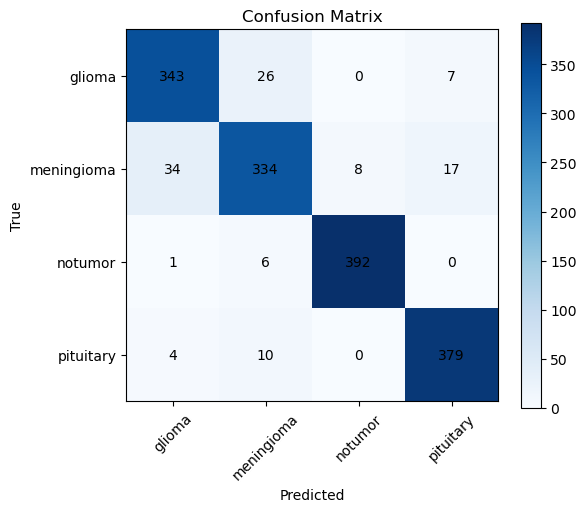

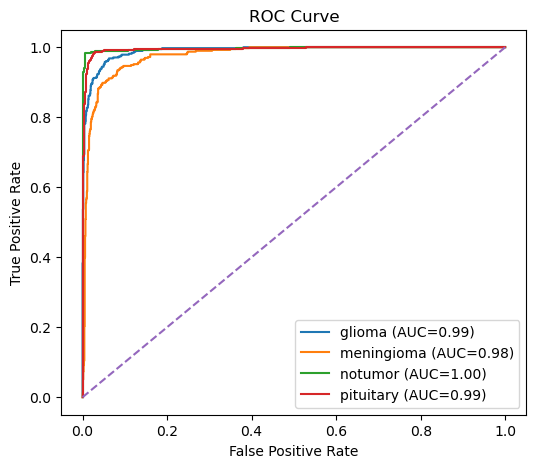

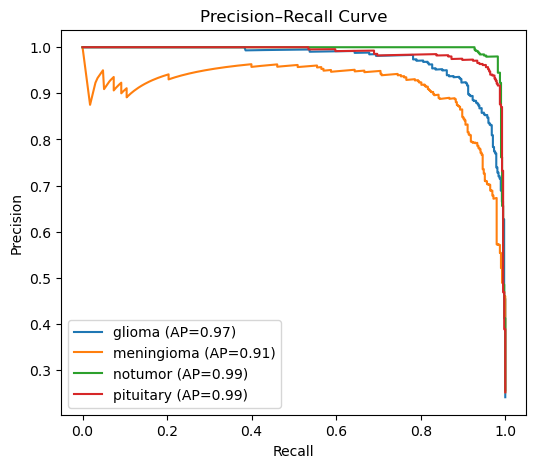

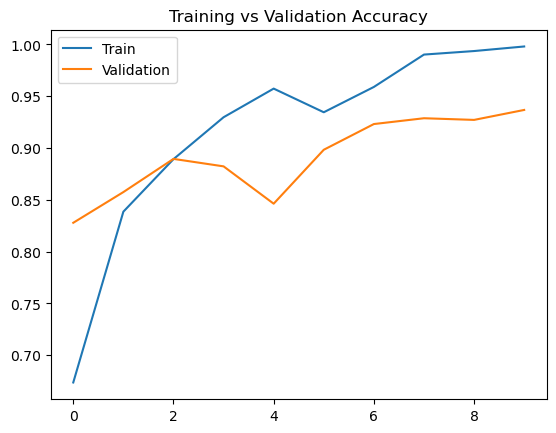

In [1]:
# Install required packages (only needed in notebook)
%pip install -q tensorflow opencv-python-headless

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.preprocessing import label_binarize
import os
import cv2

# Path to dataset
dataset_path = "dataset"   # folder containing class subfolders

# -------------------------------
# CNN MODEL
# -------------------------------
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')
    ])
    return model


# -------------------------------
# IMAGE PREPROCESSING
# -------------------------------
def preprocess_image(image):
    image = cv2.resize(image, (128, 128))
    image = image.astype("float32") / 255.0
    return image   # shape: (128,128,3)


def load_and_check_dataset(dataset_path):
    images = []
    labels = []

    for subdir, dirs, files in os.walk(dataset_path):
        for filename in files:
            if filename.lower().endswith((".jpg", ".png", ".bmp", ".jpeg")):
                path = os.path.join(subdir, filename)
                img = cv2.imread(path)

                if img is None:
                    continue

                img = preprocess_image(img)
                images.append(img)

                label = os.path.basename(subdir)
                labels.append(label)

    if len(images) == 0:
        raise ValueError("No images found in dataset.")

    return np.array(images), np.array(labels)


# -------------------------------
# PLOTS
# -------------------------------
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.yticks(range(len(class_names)), class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")

    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()


def plot_roc_curve(y_test, y_pred_prob, class_names):
    num_classes = len(class_names)
    y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))

    plt.figure(figsize=(6, 5))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


def plot_precision_recall_curve(y_test, y_pred_prob, class_names):
    num_classes = len(class_names)
    y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))

    plt.figure(figsize=(6, 5))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(
            y_test_bin[:, i], y_pred_prob[:, i]
        )
        ap = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
        plt.plot(recall, precision, label=f"{class_names[i]} (AP={ap:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curve")
    plt.legend()
    plt.show()


# -------------------------------
# MAIN PIPELINE
# -------------------------------
def main():
    # Load data
    X, labels = load_and_check_dataset(dataset_path)

    print("Dataset shape:", X.shape)

    # Encode labels
    class_names = np.unique(labels)
    label_to_index = {label: i for i, label in enumerate(class_names)}
    y = np.array([label_to_index[label] for label in labels])

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Build model
    model = create_cnn_model(X_train[0].shape)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # Train
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2
    )

    # Save model
    model.save("model.h5")
    print("Model saved as model.h5")

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test)
    print("Test accuracy:", acc)

    # Predict
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Plots
    plot_confusion_matrix(y_test, y_pred, class_names)
    plot_roc_curve(y_test, y_pred_prob, class_names)
    plot_precision_recall_curve(y_test, y_pred_prob, class_names)

    # Training curve
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Validation")
    plt.legend()
    plt.title("Training vs Validation Accuracy")
    plt.show()


if __name__ == "__main__":
    main()

